In [16]:
import numpy as np
from matplotlib import pyplot as plt #this is the traditional method
from statistics import stdev

In [17]:
file_folder = '../data/III session/Voltage-time/'
file_name = 'VTime16kHz.csv'
data_file = file_folder + file_name
time16,V_gen16, V_R16, V_L16, V_C16  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)
file_name = 'VTime22kHz.csv'
data_file = file_folder + file_name
time22,V_gen22, V_R22, V_L22, V_C22  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)

folder = '../data/III session/Voltage-time/'
file_name = 'squareWave10Hz.csv'
data_file = folder + file_name
V_gen_sw = np.loadtxt(data_file, delimiter=',', skiprows=1, usecols=(1), unpack=True)

sigma_y = np.full((len(time16),1), stdev(V_gen_sw))


In [18]:
def V_16_gen_model(t,f,V_0):
    return V_0*np.cos(2*np.pi*f*t)

In [19]:
from scipy.optimize import curve_fit

fit_gen,covariance_gen = curve_fit(V_16_gen_model, time16, V_gen16,p0=[16000,2.5])

print(fit_gen[0],'\n',fit_gen[1])

15387.481185990871 
 1.7820566938538351


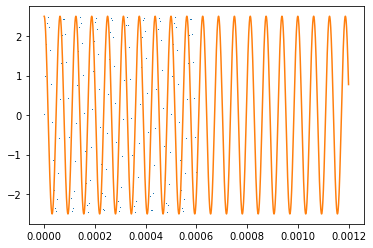

In [20]:
time = np.linspace(0,0.0012,10000)
voltage = V_16_gen_model(time,16000,2.5)

plt.plot(time16,V_gen16,linestyle='None',marker=',')
plt.plot(time,voltage)

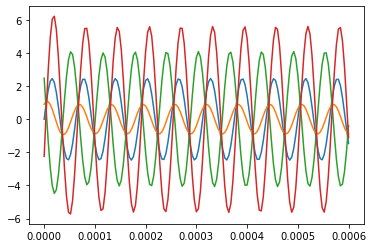

In [21]:
plt.plot(time16,V_gen16)
plt.plot(time16,V_R16)
plt.plot(time16,V_L16)
plt.plot(time16,V_C16)

plt.savefig('../figs/V-t16kHz.pdf')

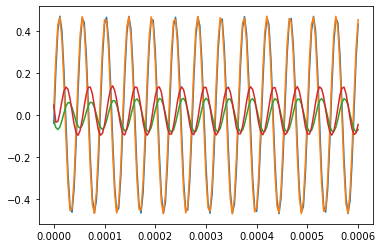

In [22]:
plt.plot(time22,V_gen22)
plt.plot(time22,V_R22)
plt.plot(time22,V_L22)
plt.plot(time22,V_C22)
plt.savefig('../figs/V-t22kHz.pdf')

In [23]:
def L_volt_model(t, f, R, L, C, V_0):
    amp = (2*np.pi*f * L * V_0) / (np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2))
    sin = np.cos(2*np.pi*f *t+ np.arctan((1- (2*np.pi*f)**2*L*C)/(R*2*np.pi*f*C)) + np.pi/2)
    return amp*sin
def C_volt_model(t,f, R, L, C, V_0):
    amp = (V_0 / (2*np.pi*f * C))/(np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2))
    sin = np.cos(2*np.pi*f *t+ np.arctan((1- (2*np.pi*f)**2*L*C)/(R*2*np.pi*f*C)) - np.pi/2)
    return amp*sin

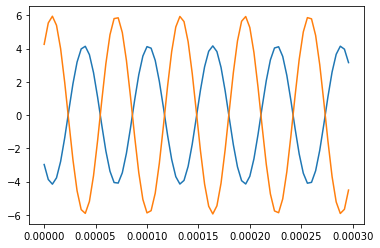

In [25]:
t = np.arange(0,0.00030,4e-6)
f = 16000
R = 2000
L = 0.0474
C = 1.46e-09
V_0 = 2.5
voltL = L_volt_model(t,f,R,L,C,V_0)
voltC = C_volt_model(t,f,R,L,C,V_0)

plt.plot(t,voltL)
plt.plot(t,voltC)